# Logistic Regression: Predicting Titanic Survivors

In this project, we'll be working with the classic Titanic Dataset. These data contain information on 891 Titanic passengers, whether they survived the voyage or not and several features such as ticket class, name, sex, age, etc. We'll try to use these features to predict whether the passenger survived or not using one of the most widely used classification algorithms: logistic regression.

In [11]:
# packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("titanic.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Why not linear regression?

In your typical regression problem you are using a set of features to predict some continuous, numerical output. Linear regression is fine for this situation because our regression formula
$$\bf \hat{y} = x^Tw$$
will map our feature/weight combintations to some continuous, numerical output. Classification is very different because our target variable is now a 0 or a 1 indicating whether the positive case occurred, not a continuous number. In this situtation what we're actually interested in is the probability our observation belongs a certain class given its features.

Instead of throwing out the linear regression idea altogether, we'll do a trick to constrain the output between 0 and 1. Consider the following linear model:

$$ \hat{y} = w_0 + w_1x $$

Step 1: Find a function that is always positive ( >=0).
What could we do to the right hand side of the equation to make it always positive? How about applying the exponential function?
$$ e^{w_0 + w_1x}$$


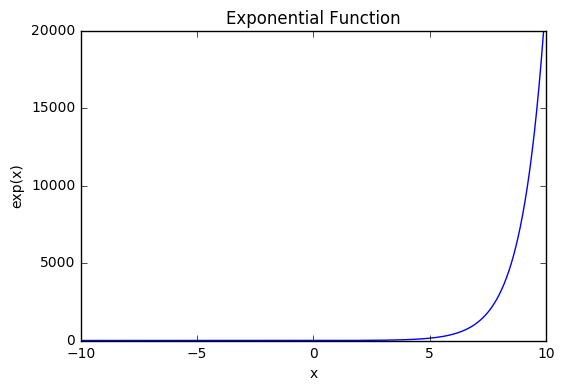

In [34]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, np.exp(x))
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.title('Exponential Function')

Great, now we have an output that is >=0.

Step 2: Constrain the function so that it is less than or equal to 1. What would make this function always = 1? Well we could divide it by itself of course. 

$$ \frac{e^{w_0 + w_1x}}{e^{w_0 + w_1x}} = 1$$

That would just give us a constant which doesn't really help us, but what would happen if we divided it by itself PLUS some small amount, say 1.
$$ \frac{e^{w_0 + w_1x}}{e^{w_0 + w_1x} + 1} = \frac{1}{1 + e^{-(w_0 + w_1x)}}$$


(-0.1, 1.1)

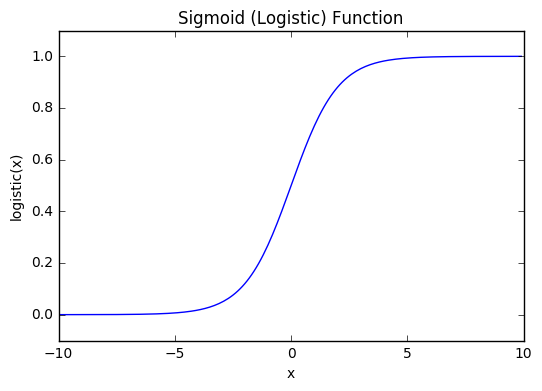

In [40]:
plt.plot(x, 1 / (1 + np.exp(-x)))
plt.xlabel('x')
plt.ylabel('logistic(x)')
plt.title('Sigmoid (Logistic) Function')
plt.ylim(-0.1, 1.1)

This is known as the "sigmoid" or "logistic" function, and it has the property that we need for classification, namely that it maps a continuous input to a value between 0 and 1. The idea behind logistic regression is that this function will serve as the link between the features of the data and our categorical target variable.

### to be continued...